In [40]:
import torch 

unemb = torch.tensor([
    [1, 2], # king
    [2, 3], # queen
    [3, 2], # roi
    [4, 3], # reine
]).to(float)

gamma_bar_W = (unemb[1] - unemb[0])
gamma_bar_Z = torch.stack([unemb[2] - unemb[0], unemb[3] - unemb[1]]).mean(dim=0)
gamma_bar_W @ gamma_bar_Z # we wooo 

tensor(2., dtype=torch.float64)

In [41]:
centered = unemb - unemb.mean(dim=0)
cov_gamma = (centered.T @ centered) / len(unemb)

eigenvals, eigenvecs = torch.linalg.eigh(cov_gamma)

D = torch.diag(eigenvals)
D_sqrt = torch.diag(torch.sqrt(eigenvals))
D_inv = torch.diag(1 / torch.sqrt(eigenvals))

sqrt_cov = eigenvecs @  D_sqrt @ eigenvecs.T
inv_sqrt_cov = eigenvecs @  D_inv @ eigenvecs.T

g = unemb @ inv_sqrt_cov

g_bar_W = g[1] - g[0] # queen - king in g-space
g_bar_Z = torch.stack([g[2] - g[0], g[3] - g[1]]).mean(dim=0)

# causal inner product
print(f"OG dot product: {gamma_bar_W @ gamma_bar_Z}") 
print(f"Causal dot product: {g_bar_W @ g_bar_Z}") 

OG dot product: 2.0
Causal dot product: 2.220446049250313e-16


In [42]:
print(gamma_bar_W @ inv_sqrt_cov)
print(g_bar_W)

tensor([0.6325, 1.8974], dtype=torch.float64)
tensor([0.6325, 1.8974], dtype=torch.float64)


In [43]:
T = unemb @ inv_sqrt_cov
t_centered = T - T.mean(dim=0)
t_centered.T @ t_centered / len(T)

tensor([[ 1.0000e+00, -1.4310e-16],
        [-1.4310e-16,  1.0000e+00]], dtype=torch.float64)

Text(0.5, 1.0, 'Transformed')

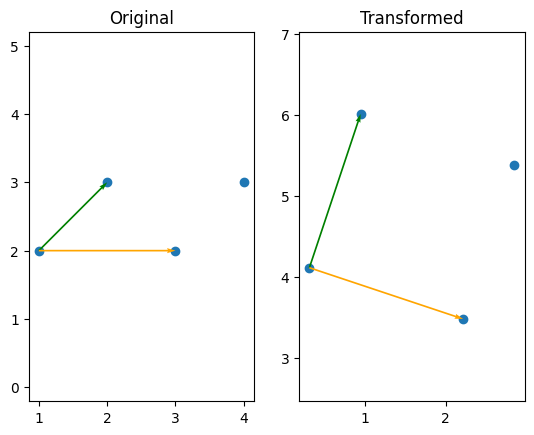

In [44]:
import matplotlib.pyplot as plt 

plt.subplot(1, 2, 1)
plt.scatter(unemb[:, 0], unemb[:, 1])
plt.quiver(*unemb[0], *gamma_bar_W, color='green', scale=1, scale_units='xy', angles='xy')
plt.quiver(*unemb[0], *gamma_bar_Z, color='orange', scale=1, scale_units='xy', angles='xy')
plt.axis('equal')
plt.title('Original')

plt.subplot(1, 2, 2)
plt.scatter(g[:, 0], g[:, 1])
plt.quiver(*g[0], *g_bar_W, color='green', scale=1, scale_units='xy', angles='xy')
plt.quiver(*g[0], *g_bar_Z, color='orange', scale=1, scale_units='xy', angles='xy')
plt.axis('equal')
plt.title('Transformed')

In [45]:
lambda_x = torch.tensor([2.0, 2.5]).to(float)
original_logits = lambda_x @ unemb.T

l = lambda_x @ sqrt_cov
causal_logits = l @ g.T

# l = lambda @ sqrt_cov (1)
# g = gamma @ inv_sqrt_cov (2)
# I = sqrt_cov @ inv_sqrt_cov (3)
# since equation (3) gives I, logits are preserved when doing l(x) @ g(y)
print(f"logits:        {original_logits}")
print(f"causal logits: {causal_logits}")

logits:        tensor([ 7.0000, 11.5000, 11.0000, 15.5000], dtype=torch.float64)
causal logits: tensor([ 7.0000, 11.5000, 11.0000, 15.5000], dtype=torch.float64)
